# Demonstration of QCA HDF5 Singlepoint Dataset

In [81]:
import h5py as h5
import json
import matplotlib.pyplot as plt

In [92]:
# use command line tool h5glance to get a quick overview of the HDF5 file structure
# The h5 file is divided into entries and specifications
! h5glance dataset_153.h5 -d 1

dataset_153.h5 (5 attributes)
├entries	(189 children) (1 attributes)
└specifications	(1 children) (1 attributes)



In [93]:
# The specifications contain references to the entries 
# and aggregated properties of the dataset.
! h5glance dataset_153.h5 specifications -d 2

dataset_153.h5/specifications (1 attributes)
└spec_0 (10 attributes)
  ├entry_references	[UTF-8 string: 189]
  └properties	(57 children)



In [97]:
dataset_name = "dataset_153"
filepath = f"{dataset_name}.h5"

with h5.File(filepath, "r") as dataset:
    # Get the overall attributes
    print("Overall attributes:")
    for key in dataset.attrs.keys():
        print(f"{key}: {dataset.attrs[key]}")
    element_counts = json.loads(dataset.attrs.get("element_composition", None))


Overall attributes:
description: 
element_composition: {"B": 189, "C": 2070, "O": 449, "H": 2267, "N": 155, "Br": 4, "Cl": 17, "F": 2, "S": 14}
metadata: {}
name: OpenFF NCI250K Boron 1
version: 0.1


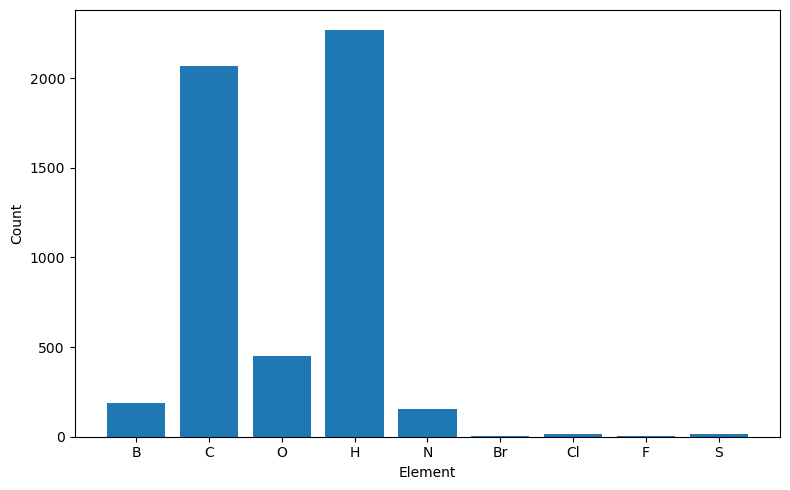

In [98]:
# Can make a plot of the elemental composition
# this was calculated during file creation and stored as metadata in the HDF5 file
elements = list(element_counts.keys())
counts = list(element_counts.values())

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(elements, counts)
plt.xlabel('Element')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [99]:
# Let's look at the properties for a specification

with h5.File(filepath, "r") as dataset:
    # Get the specifications group
    specifications_group = dataset["specifications"]

    example_spec = list(specifications_group.keys())[0] 

    print(f"\nSelected specification: {example_spec}")

    # List all items inside the example_spec group
    print(f"\nContents inside specifications/{example_spec}/properties:")
    for name in specifications_group[example_spec]["properties"]:
        print(name)

    # Get return_energy
    spec_entries = specifications_group[example_spec]["entry_references"][:]
    return_energy = specifications_group[example_spec]["properties"]["return_energy"][:]
    current_gradient = specifications_group[example_spec]["properties"]["current gradient"][:]
    entry_references = specifications_group[example_spec]["entry_references"][:]
    entry_map = json.loads(dataset["entries"].attrs["entries_map"][:])


    entry_references = [ref.decode('utf-8') if isinstance(ref, bytes) else ref for ref in specifications_group[example_spec]["entry_references"][:]]


Selected specification: spec_0

Contents inside specifications/spec_0/properties:
-d energy
-d gradient
2-body dispersion correction energy
2-body dispersion correction gradient
b3lyp-d3(bj) dispersion correction energy
b3lyp-d3(bj) dispersion correction gradient
calcinfo_nalpha
calcinfo_natom
calcinfo_nbasis
calcinfo_nbeta
calcinfo_nmo
current dipole x
current dipole y
current dipole z
current energy
current gradient
current hessian
current reference energy
dft functional total energy
dft total energy
dft vv10 energy
dft xc energy
dispersion correction energy
dispersion correction gradient
mayer indices
nuclear repulsion energy
nuclear_repulsion_energy
one-electron energy
pcm polarization energy
pe energy
return_energy
return_result
scf dipole x
scf dipole y
scf dipole z
scf iteration energy
scf iterations
scf quadrupole xx
scf quadrupole xy
scf quadrupole xz
scf quadrupole yy
scf quadrupole yz
scf quadrupole zz
scf total energy
scf total gradient
scf_dipole_moment
scf_dispersion_cor

In [101]:
# return_energy is a scalar value for each entry in the dataset
# so we can easily construct a dataframe
import pandas as pd

names = [ entry_map[k] for k in entry_references ] # map the entry references to actual names   

# Create a DataFrame to hold the return_energy values
energy_df = pd.DataFrame(return_energy, columns=["return_energy"], index=names)

energy_df.head()


,return_energy
B(/C=C\C)(O)O-0,-293.982306
B(/C=C\C)(O)O-1,-293.981760
B(C1=CC(N=C1)(c2ccccc2)c3ccccc3)(O)O-0,-848.417977
B(C1=CC(N=C1)(c2ccccc2)c3ccccc3)(O)O-1,-848.420399
B(C1=CC(N=C1)(c2ccccc2)c3ccccc3)(O)O-2,-848.421185


In [102]:
gradient_dict = { names[i] : current_gradient[i] for i in range(len(names)) } # map the entry references to actual names

In [103]:
gradient_dict

{'B(/C=C\\C)(O)O-0': array([ 1.59195783e-05,  3.31971646e-05,  4.14693665e-05, -1.90796434e-05,
        -2.47942049e-05, -1.29665096e-05,  1.69828200e-05,  3.40941434e-06,
        -2.74996236e-07,  5.12137606e-06,  3.09270870e-06,  4.32693847e-06,
         1.80056867e-05,  1.16929508e-05, -1.24283270e-05, -2.59242262e-07,
        -2.11664812e-05, -2.46775195e-05,  8.46361479e-06, -4.71827615e-07,
         6.23676052e-06, -1.14001191e-05,  3.63502407e-06, -1.35631671e-07,
        -1.77287247e-06, -7.82020146e-06,  1.66168723e-07, -8.62587042e-07,
        -2.88873270e-06, -5.78969922e-06, -5.10160367e-06, -1.59065411e-06,
         5.62206364e-07, -2.55171455e-06, -4.00824395e-07,  3.70076837e-06,
         1.22295493e-05,  1.02824960e-06,  1.66419796e-06]),
 'B(/C=C\\C)(O)O-1': array([-2.41650470e-06,  1.82227191e-06,  4.81479317e-06,  9.72521117e-06,
        -3.17097863e-05, -3.27994218e-05, -7.88948495e-06,  1.47917569e-05,
         2.04300621e-05, -3.39537546e-06,  1.85339972e-06, -1.5